In [1]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def load_img(filepath):
  '''
  This function loads the image from the given filepath
  
  Arguments:
  filepath of the image file
  
  Returns:
  the image retrieved
  '''
  img = cv2.imread(filepath)
  if img is None:
    print("File is not found or invalide file format")
    return None
  else:
    return img

In [ ]:
def sketch(img):
  '''
  This function converts the given picture into the pencil sketch by converting it to greyimage followed by inverting it and blurring it and again inverting it
  
  Arguments:
  the image whose pencil sketch is required
  
  Returns:
  the pencil sketch of the image provided
  '''
  greyimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  if greyimg is None:
    print("converting to grey has failed")
  invertedimg = 255 - greyimg
  print("Enter kernel size for Gaussian Blur: ")
  kernel = int(input())
  blur = cv2.GaussianBlur(invertedimg, (kernel,kernel), 0)
  if blur is None:
    print("Gaussian Blur has failed")
  invertedblur = 255 - blur
  epsilon = 1e-6
  value = greyimg/(invertedblur + epsilon)
  value = value*255
  sketch = np.clip(value, 0, 255).astype(np.uint8)
  
  return sketch

In [40]:
def color_sketch(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
    inverted_v = 255 - v
    print("enter kernel size for Gaussian Blur: ")
    kernel = int(input())
    blur = cv2.GaussianBlur(inverted_v, (kernel, kernel), 0)
    inverted_blur = 255 - blur
    epsilon = 1e-6
    value = v/(inverted_blur + epsilon)
    value = value*255
    sketch = np.clip(value, 0, 255).astype(np.uint8)
    s = cv2.GaussianBlur(s, (kernel, kernel), 0)
    s = cv2.multiply(s, 0.4)
    final_sketch = cv2.merge([h, s, sketch])
    final_sketch = cv2.cvtColor(final_sketch, cv2.COLOR_HSV2BGR)
    return final_sketch


In [46]:
print("enter the filepath of the photo")
filepath = str(input())
img = load_img(filepath)
if img is None:
    print("picture loading failed")
else:
    final_img = sketch(img)
    final_colour = color_sketch(img)
    final_colour= cv2.cvtColor(final_colour, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

enter the filepath of the photo
Enter kernel size for Gaussian Blur: 
enter kernel size for Gaussian Blur: 


(np.float64(-0.5), np.float64(254.5), np.float64(197.5), np.float64(-0.5))

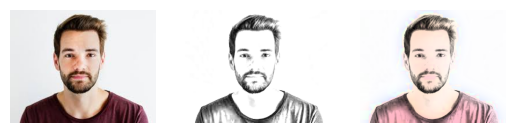

In [47]:
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(final_img, cmap = 'gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(final_colour)
plt.axis('off')

In [13]:
cv2.imwrite('sketch.jpg', final_img)

True